In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'forestgreen'
nsc_color = 'dodgerblue'
eco_color = 'rebeccapurple'

# Plot the cost effectiveness plane

In [4]:
cra = [5566.0235, 30.8985]
nsc = [4816.6006, 30.9026]
eco = [4854.6558, 30.9039]

line_x = [nsc[0], eco[0]]
line_y = [nsc[1], eco[1]]

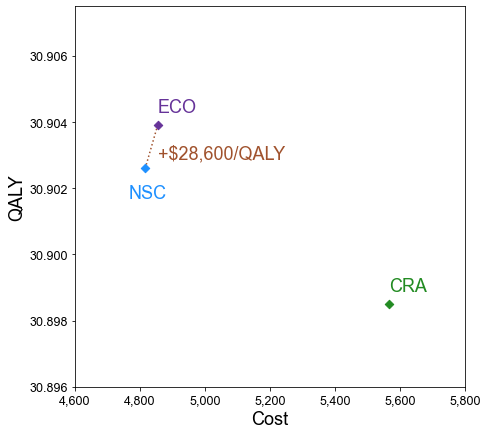

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.plot(line_x, line_y, color='sienna', zorder=1, linestyle='dotted')
plt.scatter(cra[0], cra[1], label="CRA", color=cra_color, marker='D')
plt.text(cra[0], cra[1]+0.0004, "CRA", color=cra_color)
plt.scatter(nsc[0], nsc[1], label="NSC", color=nsc_color, marker='D', zorder=2)
plt.text(nsc[0]-50, nsc[1]-0.0009, "NSC", color=nsc_color)
plt.scatter(eco[0], eco[1], label="ECO", color=eco_color, marker='D', zorder=3)
plt.text(eco[0], eco[1]+0.0004, "ECO", color=eco_color)
plt.text(eco[0], eco[1]-0.001, "+$28,600/QALY", color='sienna')
plt.xlim(4600, 5800)
plt.ylim(30.896, 30.9075)
plt.xlabel('Cost')
plt.ylabel('QALY')
plt.show()

# Plot the PSA

In [6]:
psa = pd.read_csv("PSA/psa100000_scatter_new.csv")

In [7]:
psa.columns

Index(['Iteration', 'Parameters', 'pSepsis1', 'pChorio', 'pSepsis1c',
       'pSepsis2Red', 'pSepsis2YellowBCPos', 'pIllAppearingBCPosYellow',
       'pIllAppearingGreen', 'pIllAppearingNoChorio', 'pIllAppearingStrat3',
       'pSepsis3', 'pSepsis2Green', 'pYellow', 'pRed', 'scale2', 'scale3',
       'pSepsis3Scaled', 'pSepsis2GreenScaled', 'pSepsis2YellowBCPosScaled',
       'pSepsis2RedScaled', 'IncidenceEOS', 'scale1', 'pSepsis1Scaled',
       'pSepsis1cScaled', 'pReadmission', 'pDeathAfterReadmission',
       'pLTSAfterReadmission', 'pOtotoxicity', 'pLTSCSFPos', 'pCSFPosDeath',
       'pCSFNegDeath', 'pCSFPos', 'cLevel1NurseryAdmissionPerDay',
       'cLevel1NursingCarePerDay', 'cLevel2NICUAdmissionPerDay',
       'cLevel2NursingCarePerDay', 'cGentamicin1', 'cAmpicillin1',
       'cInitialNICUTests', 'cBloodCulture1', 'cCSFNeg', 'cReadmission',
       'qNLTS', 'qDeath', 'qNCD', 'qOtotoxicity', 'c2DayNursery', 'c7DayNICU',
       'cYellow', 'c2DayNICU', 'cCSFPos', 'cDeath', 'cNCD', 

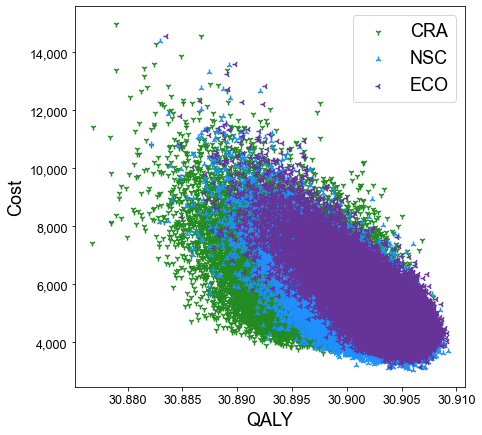

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(psa["Categorical Risk Assessment.1"], psa["Categorical Risk Assessment"],
            label="CRA", color=cra_color, marker='1', zorder=1)
plt.scatter(psa["NSC.1"], psa["NSC"],
            label="NSC", color=nsc_color, marker='2', zorder=2)
plt.scatter(psa["Enhanced Clinical Observation.1"], psa["Enhanced Clinical Observation"],
            label="ECO", color=eco_color, marker='3', zorder=3)
plt.xlabel('QALY')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [9]:
x_vals = np.arange(-0.010, 0.020, 0.01)

In [10]:
wtp100000 = 100000*x_vals
wtp50000 = 50000*x_vals

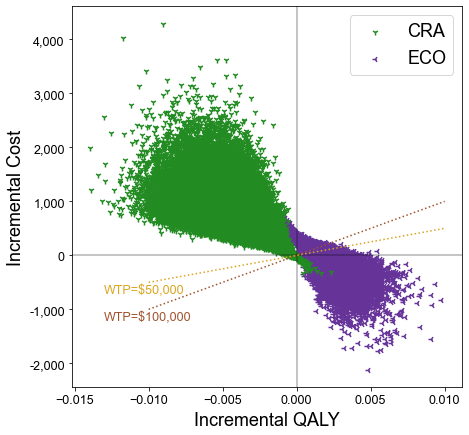

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(psa["Categorical Risk Assessment.1"] - psa["NSC.1"], psa["Categorical Risk Assessment"] - psa["NSC"],
            label="CRA", color=cra_color, marker='1', zorder=4)
plt.scatter(psa["Enhanced Clinical Observation.1"] - psa["NSC.1"], psa["Enhanced Clinical Observation"] - psa["NSC"],
            label="ECO", color=eco_color, marker='3', zorder=3)
plt.axvline(x=0, color='black', alpha=0.3, zorder=5)
plt.axhline(y=0, color='black', alpha=0.3, zorder=5)
plt.plot(x_vals, wtp100000, zorder=6, label='_$100,000 WTP Threshold', color='sienna', linestyle='dotted')
plt.text(x_vals[0]-0.003, wtp100000[0]-200, "WTP=$100,000", color='sienna', fontsize='x-small')
plt.plot(x_vals, wtp50000, zorder=6, label='_$50,000 WTP Threshold', color='goldenrod', linestyle='dotted')
plt.text(x_vals[0]-0.003, wtp50000[0]-200, "WTP=$50,000", color='goldenrod', fontsize='x-small')
plt.xlabel('Incremental QALY')
plt.ylabel('Incremental Cost')
plt.legend()
plt.show()

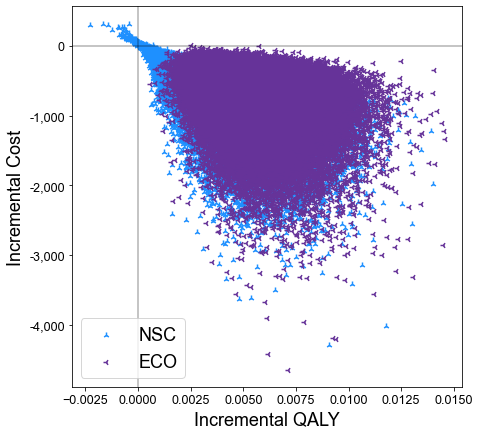

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.scatter(psa["Categorical Risk Assessment.1"] - psa["NSC.1"], psa["Categorical Risk Assessment"] - psa["NSC"],
#            label="CRA", color=cra_color, marker='.', zorder=4)
plt.scatter(psa["NSC.1"] - psa["Categorical Risk Assessment.1"], psa["NSC"] - psa["Categorical Risk Assessment"],
            label="NSC", color=nsc_color, marker='2', zorder=3)
plt.scatter(psa["Enhanced Clinical Observation.1"] - psa["Categorical Risk Assessment.1"], psa["Enhanced Clinical Observation"] - psa["Categorical Risk Assessment"],
            label="ECO", color=eco_color, marker='3', zorder=4)

plt.axvline(x=0, color='black', alpha=0.3, zorder=5)
plt.axhline(y=0, color='black', alpha=0.3, zorder=5)
plt.xlabel('Incremental QALY')
plt.ylabel('Incremental Cost')
plt.legend()
plt.show()

In [13]:
ce_accept_curve = pd.read_csv("PSA/psa100000cecurve_new.csv")

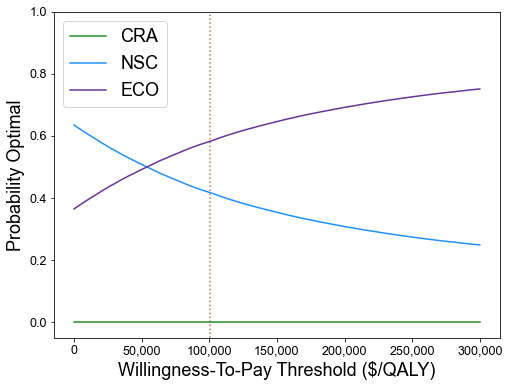

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["Categorical Risk Assessment"],
            label="CRA", color=cra_color, zorder=1)
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["NSC"],
            label="NSC", color=nsc_color, zorder=2)
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["Enhanced Clinical Observation"],
            label="ECO", color=eco_color, zorder=3)
plt.axvline(x=100175, color='sienna', alpha=0.8, zorder=0, linestyle='dotted')
plt.xlabel('Willingness-To-Pay Threshold ($/QALY)')
plt.ylabel('Probability Optimal')
plt.ylim(-0.05,1)
plt.legend()
plt.show()